<a href="https://colab.research.google.com/github/aratimo/sentiment-analysis-user-reviews-electronics/blob/main/hsir_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import string
import re

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import gensim
from gensim.models import KeyedVectors

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.text import Tokenizer

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving DatafinitiElectronicsProductData.csv to DatafinitiElectronicsProductData.csv


In [ ]:
import io

In [ ]:
data=pd.read_csv(io.BytesIO(uploaded['DatafinitiElectronicsProductData.csv']))

In [ ]:
print(data)

                        id                             asins        brand  \
0     AVpf3txeLJeJML43FN82                        B0168YIWSI    Microsoft   
1     AVpf3txeLJeJML43FN82                        B0168YIWSI    Microsoft   
2     AVpf3txeLJeJML43FN82                        B0168YIWSI    Microsoft   
3     AVpf3txeLJeJML43FN82                        B0168YIWSI    Microsoft   
4     AVpf3txeLJeJML43FN82                        B0168YIWSI    Microsoft   
...                    ...                               ...          ...   
7294  AVpgfP3DilAPnD_xtG3M                        B00IAKLM54     Logitech   
7295  AVpe8ZRY1cnluZ0-aY4H  B005MJHFHK,B00VXW0J5A,B00OY50CZU  Peerless-AV   
7296  AVpe8ZRY1cnluZ0-aY4H  B005MJHFHK,B00VXW0J5A,B00OY50CZU  Peerless-AV   
7297  AVpe8ZRY1cnluZ0-aY4H  B005MJHFHK,B00VXW0J5A,B00OY50CZU  Peerless-AV   
7298  AVpe8ZRY1cnluZ0-aY4H  B005MJHFHK,B00VXW0J5A,B00OY50CZU  Peerless-AV   

                                             categories colors  \
0     Ele

In [ ]:
column_names = data.columns.tolist()
print(column_names)

In [ ]:
data.isnull().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                 2019
dateAdded                 0
dateUpdated               0
dimension              1209
ean                    4348
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
primaryCategories         0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend    1391
reviews.numHelpful     1486
reviews.rating          164
reviews.sourceURLs        0
reviews.text              5
reviews.title             4
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
dtype: int64

In [ ]:
data.dropna(subset=['reviews.rating'], inplace=True)
data.isnull().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                 1968
dateAdded                 0
dateUpdated               0
dimension              1161
ean                    4270
imageURLs                 0
keys                      0
manufacturer           2644
manufacturerNumber        0
name                      0
primaryCategories         0
reviews.date             11
reviews.dateSeen          0
reviews.doRecommend    1227
reviews.numHelpful     1322
reviews.rating            0
reviews.sourceURLs        0
reviews.text              5
reviews.title             4
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
dtype: int64

In [ ]:
data.dropna(subset=['reviews.text'], inplace=True)
data.isnull().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                 1968
dateAdded                 0
dateUpdated               0
dimension              1161
ean                    4266
imageURLs                 0
keys                      0
manufacturer           2643
manufacturerNumber        0
name                      0
primaryCategories         0
reviews.date             11
reviews.dateSeen          0
reviews.doRecommend    1222
reviews.numHelpful     1317
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title             4
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
dtype: int64

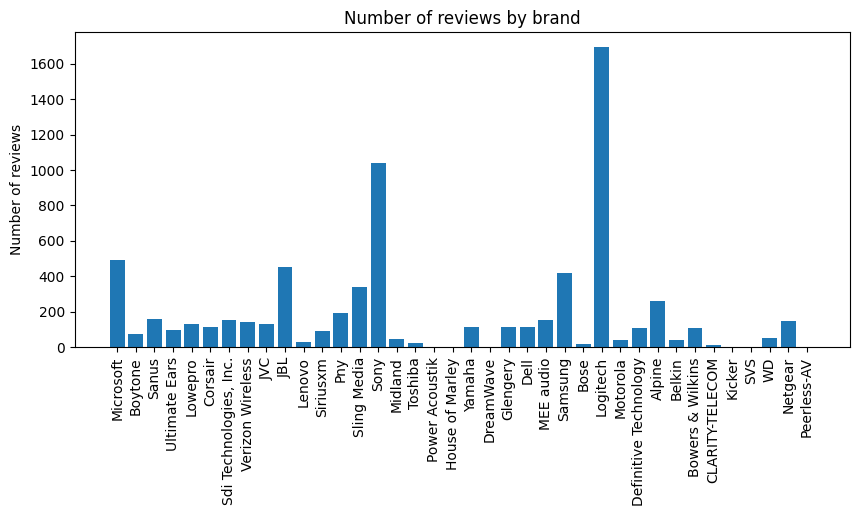

In [ ]:
# Get unique manufacturers and count number of products for each
unique_manufacturers = data['brand'].unique()
num_products_by_manufacturer = [len(data[data['brand'] == m]) for m in unique_manufacturers]

# Convert unique manufacturers to strings
unique_manufacturers = unique_manufacturers.astype(str)

# Set figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bar chart
ax.bar(unique_manufacturers, num_products_by_manufacturer)
ax.set_ylabel('Number of reviews')
ax.set_title('Number of reviews by brand')

# Adjust subplot spacing
plt.subplots_adjust(bottom=0.25)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.show()

Number of unique products: 50


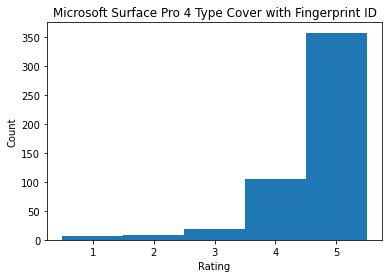

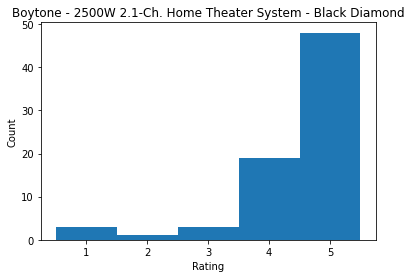

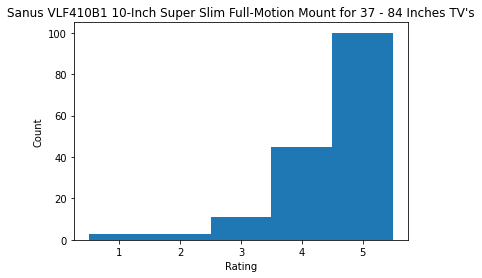

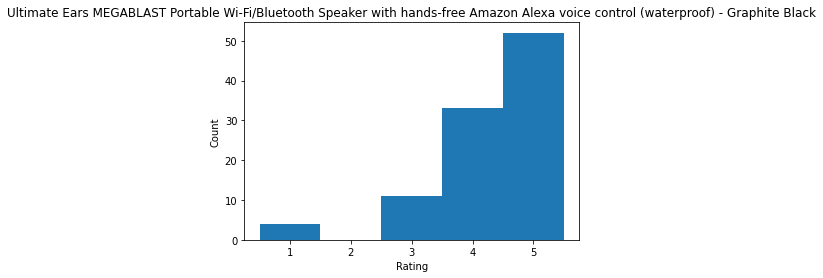

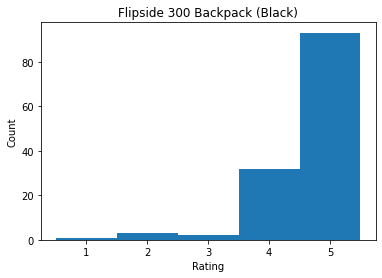

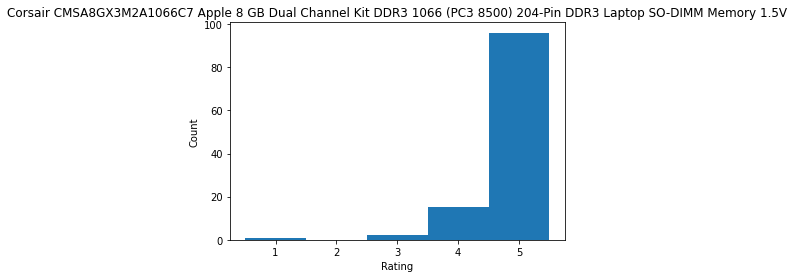

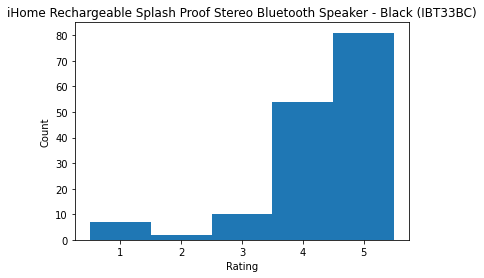

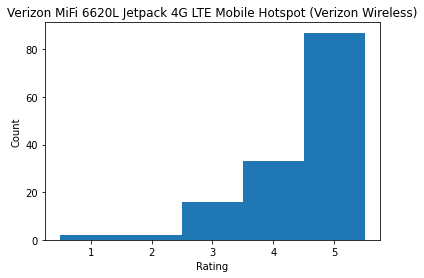

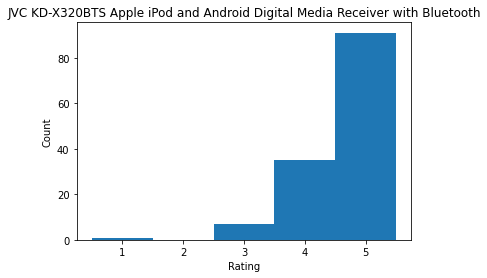

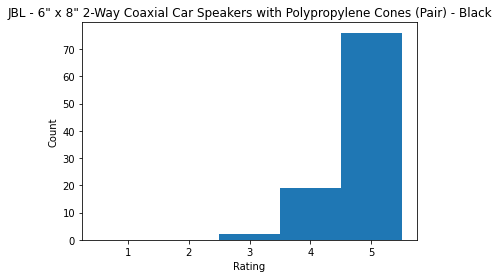

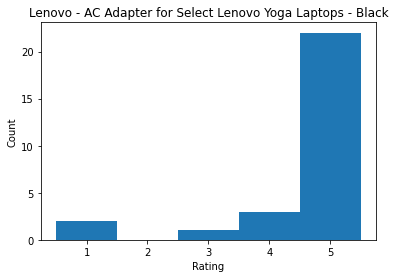

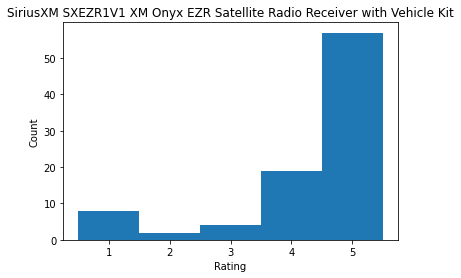

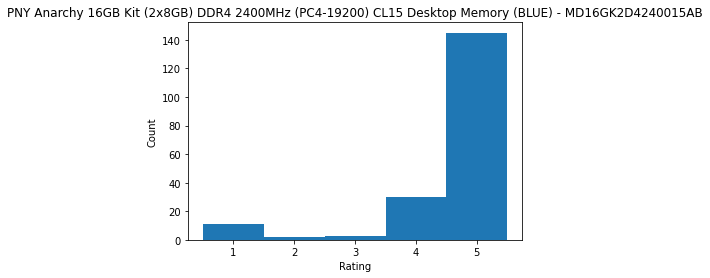

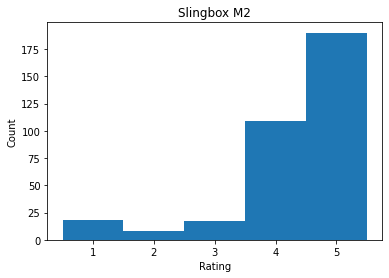

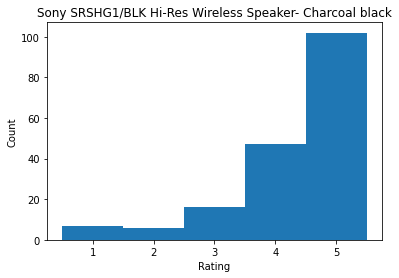

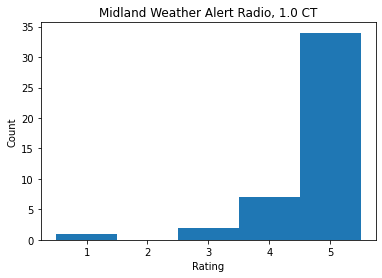

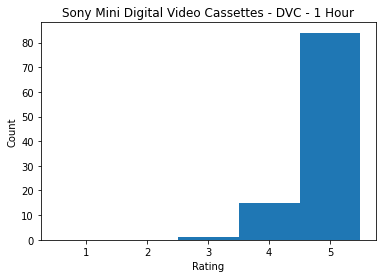

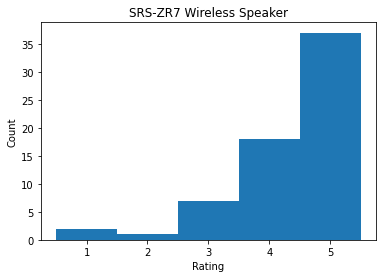

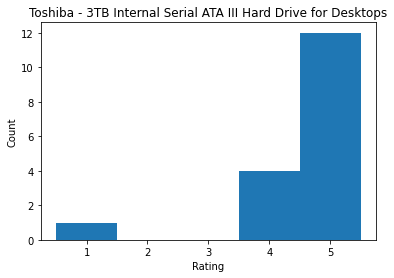

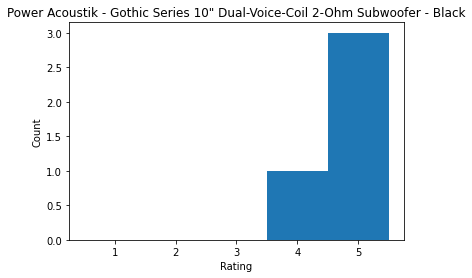

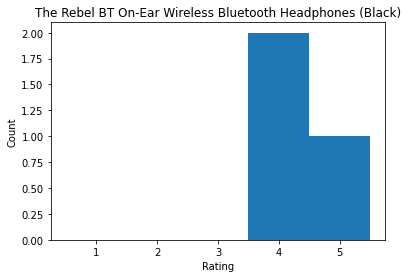

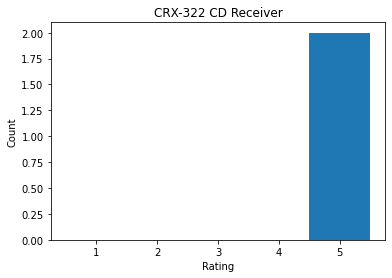

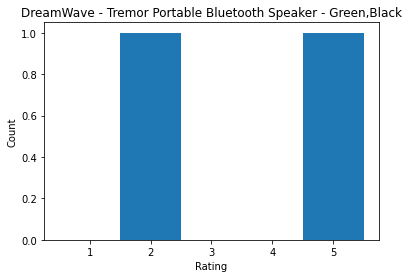

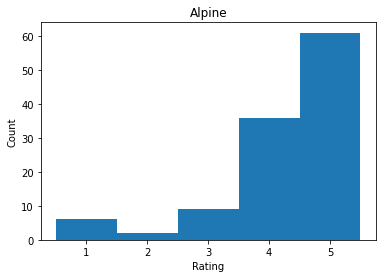

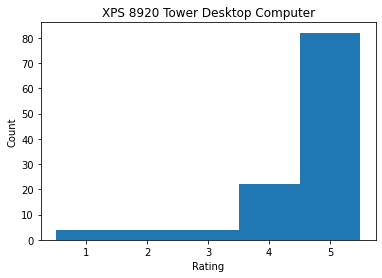

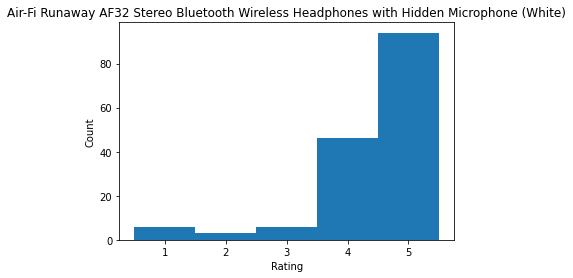

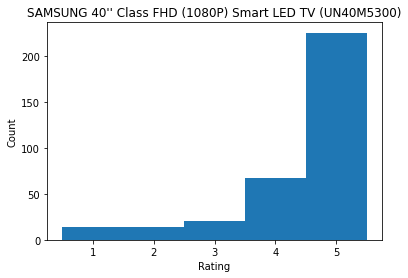

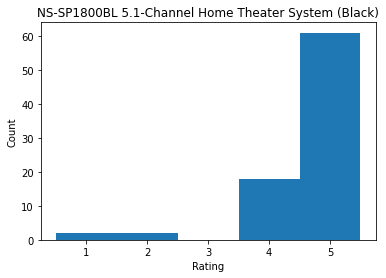

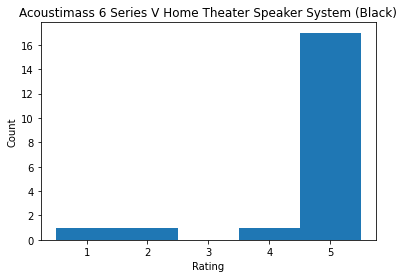

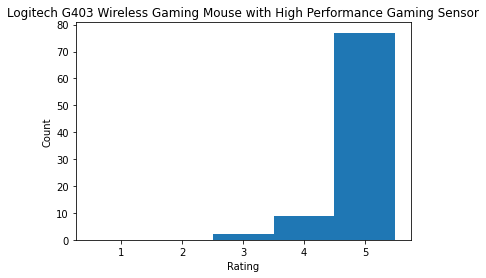

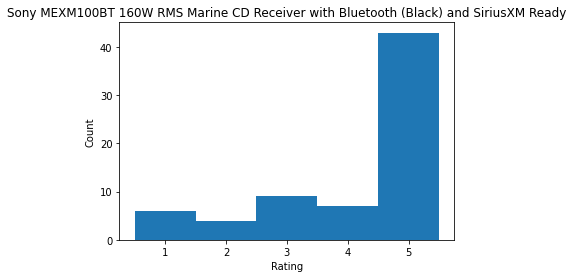

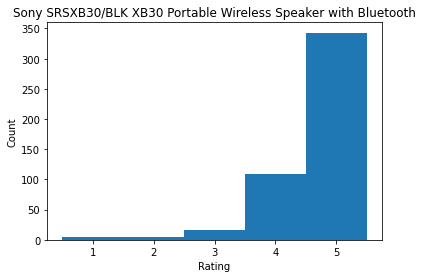

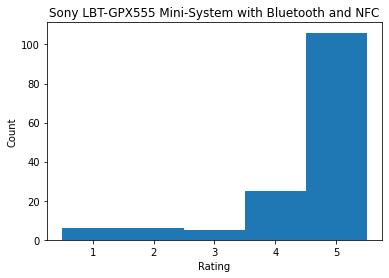

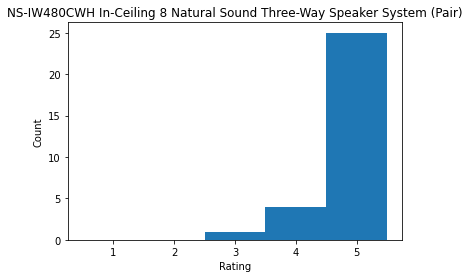

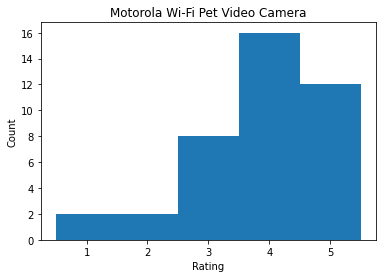

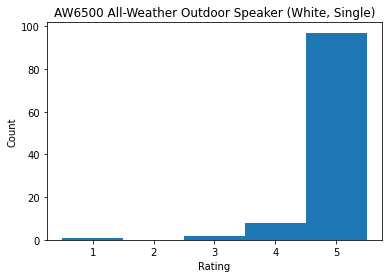

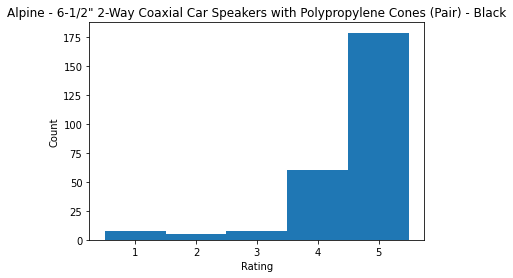

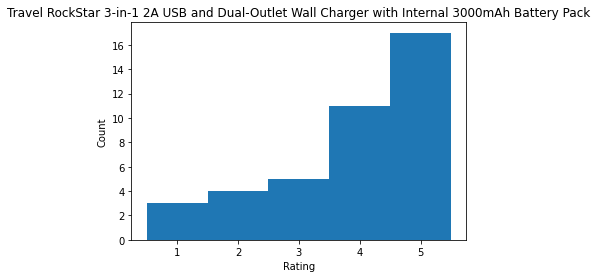

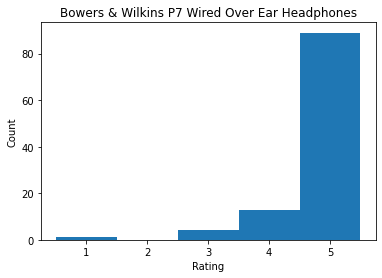

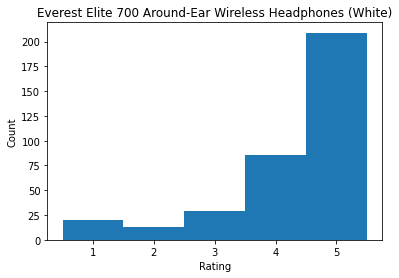

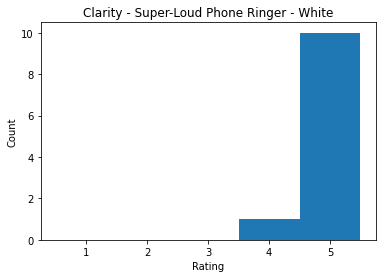

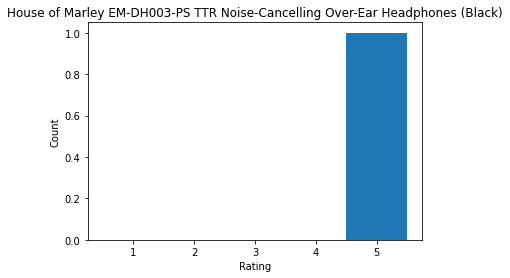

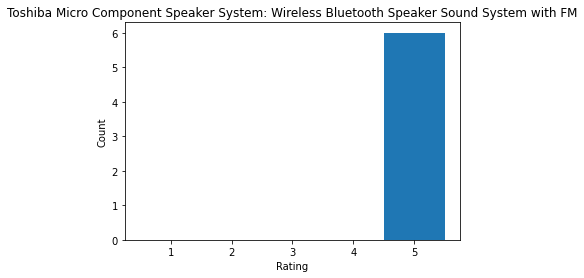

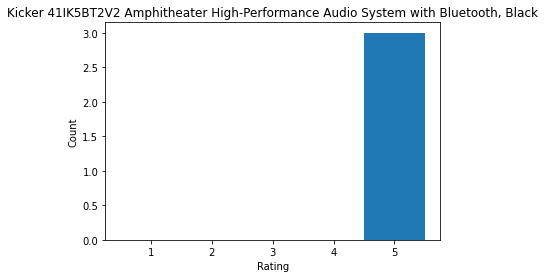

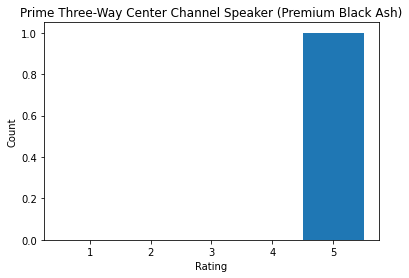

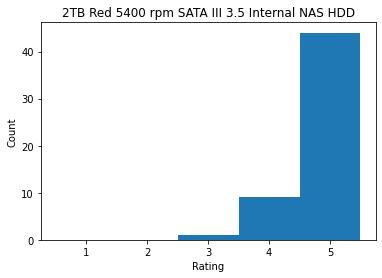

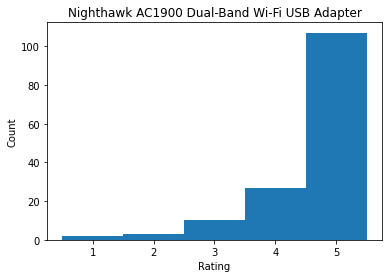

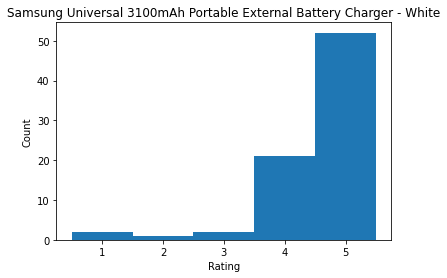

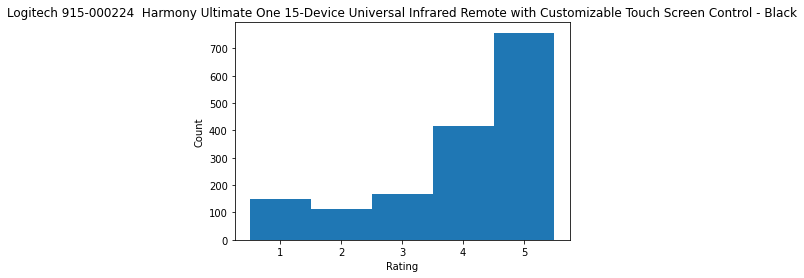

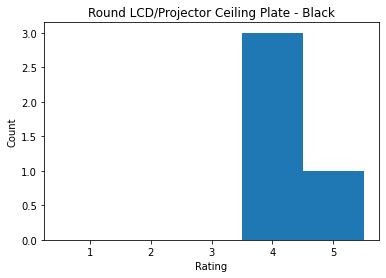

In [ ]:
# get the unique ids
unique_ids = data['id'].unique()

num_unique_products = len(unique_ids)
print("Number of unique products:", num_unique_products)

# iterate over the unique ids and plot the rating distribution for each
for i, product_id in enumerate(unique_ids):
    product_data = data[data['id'] == product_id]
    product_name = product_data['name'].iloc[0]
    plt.figure(i)
    plt.hist(product_data['reviews.rating'], bins=5, range=(0.5,5.5))
    plt.title(product_name)
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

In [ ]:
# Define preprocessing function
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub('\d', '', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [token for token in tokens if not token in stop_words]
    text = ' '.join(tokens)
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(tokens)
    
    return text

In [ ]:
def label_rating(rating):
    if rating >= 4:
        return 1.0
    elif rating <= 2:
        return -1.0
    else:
        return 0.0

data['label'] = data['reviews.rating'].apply(label_rating)

In [ ]:
# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
import gensim
data.dropna(subset=['reviews.text'], inplace=True)

# Tokenize the reviews
sentences = [review.split() for review in data['reviews.text']]

# Train the Word2Vec model
model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get the vocabulary
# Get the vocabulary
vocabulary = list(model.wv.key_to_index.keys())

# Get the word embeddings
word_vectors = model.wv

# Save the embeddings to a file
word_vectors.save_word2vec_format('custom_embeddings.txt', binary=False)

In [ ]:
from gensim.models import KeyedVectors

# load the word vectors from file
word_vectors = KeyedVectors.load_word2vec_format('custom_embeddings.txt', binary=False)

# get the embedding vector for a specific word
embedding_vector = word_vectors['light']

# print the embedding vector
print(embedding_vector)

[ 0.04656943  0.52915466 -0.19626224 -0.06879787 -0.3437018  -0.67702615
  0.5162814   0.5692206  -0.14922068 -0.5872483   0.36828932 -0.18121882
 -0.12222904  0.5056026   0.25738028 -0.62846756  0.05610811  0.03480039
 -0.28633076 -1.0692436   0.19399375  0.2568058   0.9105385   0.09354226
 -0.19677131  0.10865447 -0.6269717  -0.19337134 -0.47760895 -0.29453284
  0.3696006  -0.3575324   0.17660035 -0.74748933 -0.68245333  0.11331198
 -0.4134949  -0.27048263  0.12651917 -0.6094935  -0.07138295 -0.5275243
 -0.18795782 -0.0040393   0.09439791 -0.7995001  -0.5364854  -0.2958192
  0.52064013  0.3331944   0.37039512 -1.0601025  -0.64963293 -0.04323554
 -0.25089017  0.2801238   0.58285713  0.36012    -0.80287147  0.2803231
  0.3518393  -0.27005014  0.19232658 -0.32021213 -0.45443076  0.4626116
 -0.04638265 -0.0214262  -0.90473676  0.40403214 -0.03458698  0.51607025
  0.87087846 -0.10582031  0.77634156  0.11248767 -0.13499022  0.24360284
 -0.6827999   0.00508444 -0.46712452 -0.3798025  -1.072

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2)
train_data['label'] = ['positive' if score >= 4 else 'negative' if score <= 2 else 'neutral' for score in train_data['reviews.rating']]
train_data.dropna(subset=['label'], inplace=True)

# vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data['reviews.text'])
test_vectors = vectorizer.transform(test_data['reviews.text'])

# train an SVM model on the training data
svm = SVC(kernel='linear')
svm.fit(train_vectors, train_data['label'])

# predict the labels for the test data
predictions = svm.predict(test_vectors)

# evaluate the accuracy of the model
accuracy = accuracy_score(test_data['label'], predictions)
print('Accuracy:', accuracy)

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

# load pre-trained word embeddings
#from gensim.models import KeyedVectors

#word_vectors = KeyedVectors.load_word2vec_format('custom_embeddings.txt', binary=False)

# create tokenizer and fit on text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['reviews.text'].values)

# convert text data to sequences of word indices
train_sequences = tokenizer.texts_to_sequences(train_data['reviews.text'].values)
test_sequences = tokenizer.texts_to_sequences(test_data['reviews.text'].values)

# pad sequences to have equal length
max_len = 100
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post')

# create embedding matrix
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index))
embedding_dim = 100
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_words:
        continue
    embedding_vector = word_vectors[word] if word in word_vectors else None
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# define LSTM model with pre-trained embeddings
model = Sequential()
model.add(Embedding(num_words, embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(train_sequences, train_data['label'].values, epochs=10, batch_size=32, validation_split=0.1)

# evaluate the model on test data
loss, accuracy = model.evaluate(test_sequences, test_data['label'].values, batch_size=32)
print('Test accuracy:', accuracy)

Epoch 1/10
161/161 [==============================] - 49s 282ms/step - loss: 0.5238 - accuracy: 0.8151 - val_loss: 0.4916 - val_accuracy: 0.7933
Epoch 2/10
161/161 [==============================] - 45s 280ms/step - loss: 0.4856 - accuracy: 0.8352 - val_loss: 0.4651 - val_accuracy: 0.8021
Epoch 3/10
161/161 [==============================] - 48s 299ms/step - loss: 0.4790 - accuracy: 0.8297 - val_loss: 0.5450 - val_accuracy: 0.8494
Epoch 4/10
161/161 [==============================] - 45s 278ms/step - loss: 0.4793 - accuracy: 0.8414 - val_loss: 0.5192 - val_accuracy: 0.8529
Epoch 5/10
161/161 [==============================] - 45s 278ms/step - loss: 0.4887 - accuracy: 0.8344 - val_loss: 0.5085 - val_accuracy: 0.8494
Epoch 6/10
161/161 [==============================] - 45s 277ms/step - loss: 0.4886 - accuracy: 0.8311 - val_loss: 0.4868 - val_accuracy: 0.8021
Epoch 7/10
161/161 [==============================] - 44s 274ms/step - loss: 0.4691 - accuracy: 0.8270 - val_loss: 0.4272 - val_ac